In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: <object object at 0x000001D0B14E4600>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy 
import math
import random
from PIL import Image
import random
import sys
import operator
import os

In [3]:
image_path = '../data/Cell_Nuclei_cut.jpg'
image_name = "inputimg"
image=Image.open(image_path,'r')
width, height=image.size
imagePixels=list(image.getdata())
K = 2
def initiate_centroids(K):
    initial_centers = set()
    for x in range(K):
        initial_centers.add(imagePixels[random.randint(0,len(imagePixels)-1)])
    return initial_centers


In [4]:
old_centers = set()
new_centers = initiate_centroids(2)
   
while old_centers != new_centers:
        old_centers = new_centers
        clusterDict = dict([(key, []) for key in new_centers])
        
for eachPixelTupleIndex in range(len(imagePixels)):
            distanceDict={}
            for eachCenter in new_centers:
                pixelValues=imagePixels[eachPixelTupleIndex]
                distanceList= numpy.subtract(pixelValues,eachCenter)
                distance=0
                for eachNumber in distanceList:
                    distance+=eachNumber**2
                distance= math.sqrt(distance)
                distanceDict[eachCenter]=distance
            
            bestCenter=min(distanceDict.items(), key=operator.itemgetter(1))[0]
            clusterDict[bestCenter].append(eachPixelTupleIndex)

In [5]:
new_centers = set()
for center in clusterDict:
    new_center_temp = (0,0,0)
    for pixelIndex in clusterDict[center]:
        new_center_temp = tuple(map(operator.add, new_center_temp, imagePixels[pixelIndex]))
        new_center = tuple(map(lambda x: int(x/len(clusterDict[center])), new_center_temp))
        new_centers.add(new_center)

In [6]:
newIm = Image.new("RGB", (width, height))
pix = newIm.load()
for i in range(1, height+1):
    for j in range(width):
        for center in clusterDict:
            if ((i - 1) * width + j) in clusterDict[center]:
                pix[j,i-1] = center
newIm.save("segmented_{}_K{}.png".format(image_name, K), "PNG")
print("Hurray!It's Done!")

Hurray!It's Done!


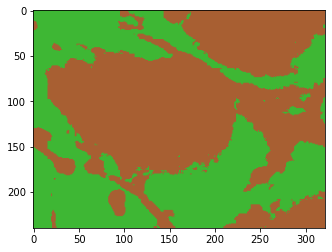

In [7]:
imshow(newIm)